# Convert noise pickle file to hdf5

In [1]:
import pickle
import os
from pprint import pprint
import numpy as np
import pandas as pd
from pytesdaq.io import FilterH5IO
import warnings
warnings.filterwarnings('ignore')

### Load pickle file and display content

In [2]:
with open('filter_example.pickle', 'rb') as f:
    filter = pickle.load(f)
    
# print keys
print(filter.keys())
print('ADC list: ' + str(filter['trigger_channels']))

# channel names
channel_names = ['IrPtTESSmall', 'IrPtTESBig','CPDv21Ge']

dict_keys(['trigger_channels', 'template', 'f', 'psd', 'f_fold', 'psd_fold'])
ADC list: ['1', '2', '3']


### Instantiate filter IO

In [4]:
# instantiate with file name 
myfilter = FilterH5IO('filter_example_convert.hdf5', verbose=True)

### Save PSD and templates

In [5]:

# let's define some metadata (can be anything)
metadata = {'version':1, 'run':20, 'comment':'Co57 data taking'}

# loop channels 
for ichan in range(len(channel_names)):
    name = channel_names[ichan]
    
    # add adc chan in metadata
    metadata['adc_chan'] = filter['trigger_channels'][ichan]
    
    # psd
    myfilter.save_psd(name, filter['psd'][ichan], filter['f'][ichan], 
                      fold=False, attributes=metadata, overwrite=False)
    
    
    # psd fold
    myfilter.save_psd(name, filter['psd_fold'][ichan], filter['f_fold'][ichan], 
                      fold=True, attributes=metadata, overwrite=False)

    
    # template
    myfilter.save_template(name, filter['template'][ichan],
                           attributes=metadata, overwrite=False)
    
    # let's add a second/third templates with different tags 
    myfilter.save_template(name, filter['template'][ichan], tag='3poles',
                           attributes=metadata, overwrite=False)
    
    myfilter.save_template(name,filter['template'][ichan], tag='glitch',
                           attributes=metadata, overwrite=False)
    
    
# let's add PSD sum of two channels  (picking one of noise/template...)
metadata['adc_chan'] = [1,2]
myfilter.save_psd('IrPtTESSmall+IrPtTESBig', filter['psd_fold'][0], filter['f_fold'][0],
                  fold=True, attributes=metadata, overwrite=False)
myfilter.save_psd('IrPtTESSmall+IrPtTESBig', filter['psd'][0], filter['f'][0],
                  fold=False, attributes=metadata, overwrite=False)
myfilter.save_template('IrPtTESSmall+IrPtTESBig',filter['template'][0],
                       attributes=metadata, overwrite=False)



# let's add two channels subtraction (picking one of noise/template...)
metadata['adc_chan'] = [1,2]
myfilter.save_psd('IrPtTESSmall-IrPtTESBig', filter['psd_fold'][0], filter['f_fold'][0],
                  fold=True, attributes=metadata, overwrite=False)
myfilter.save_psd('IrPtTESSmall-IrPtTESBig', filter['psd'][0], filter['f'][0],
                  fold=False, attributes=metadata, overwrite=False)
myfilter.save_template('IrPtTESSmall-IrPtTESBig',filter['template'][0],
                       attributes=metadata, overwrite=False)


Storing /IrPtTESSmall/psd in filter_example_convert.hdf5
Storing /IrPtTESSmall/psd_fold in filter_example_convert.hdf5
Storing /IrPtTESSmall/template in filter_example_convert.hdf5
Storing /IrPtTESSmall/template_3poles in filter_example_convert.hdf5
Storing /IrPtTESSmall/template_glitch in filter_example_convert.hdf5
Storing /IrPtTESBig/psd in filter_example_convert.hdf5
Storing /IrPtTESBig/psd_fold in filter_example_convert.hdf5
Storing /IrPtTESBig/template in filter_example_convert.hdf5
Storing /IrPtTESBig/template_3poles in filter_example_convert.hdf5
Storing /IrPtTESBig/template_glitch in filter_example_convert.hdf5
Storing /CPDv21Ge/psd in filter_example_convert.hdf5
Storing /CPDv21Ge/psd_fold in filter_example_convert.hdf5
Storing /CPDv21Ge/template in filter_example_convert.hdf5
Storing /CPDv21Ge/template_3poles in filter_example_convert.hdf5
Storing /CPDv21Ge/template_glitch in filter_example_convert.hdf5
Storing /IrPtTESSmall+IrPtTESBig/psd_fold in filter_example_convert.hdf5


### Display filter hdf5 file  and plot PSD

Filter file: filter_example_convert.hdf5:

/IrPtTESSmall+IrPtTESBig/psd: pandas.Series (25000,), metadata: {'version': 1, 'run': 20, 'comment': 'Co57 data taking', 'adc_chan': [1, 2]}
/IrPtTESSmall+IrPtTESBig/psd_fold: pandas.Series (12501,), metadata: {'version': 1, 'run': 20, 'comment': 'Co57 data taking', 'adc_chan': [1, 2]}
/IrPtTESSmall+IrPtTESBig/template: pandas.Series (25000,), metadata: {'version': 1, 'run': 20, 'comment': 'Co57 data taking', 'adc_chan': [1, 2]}
/IrPtTESSmall-IrPtTESBig/psd: pandas.Series (25000,), metadata: {'version': 1, 'run': 20, 'comment': 'Co57 data taking', 'adc_chan': [1, 2]}
/IrPtTESSmall-IrPtTESBig/psd_fold: pandas.Series (12501,), metadata: {'version': 1, 'run': 20, 'comment': 'Co57 data taking', 'adc_chan': [1, 2]}
/IrPtTESSmall-IrPtTESBig/template: pandas.Series (25000,), metadata: {'version': 1, 'run': 20, 'comment': 'Co57 data taking', 'adc_chan': [1, 2]}
/IrPtTESSmall/psd: pandas.Series (25000,), metadata: {'version': 1, 'run': 20, 'comment': '

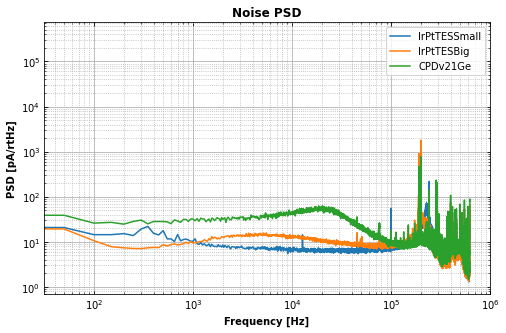

In [6]:
myfilter.describe()
myfilter.plot_psd(['IrPtTESSmall','IrPtTESBig','CPDv21Ge'], fold=True)